In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from statistics import mean

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare a Base using automap_base()
Base = automap_base()

In [6]:
# reflect the tables

Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_year = dt.date(2017, 8 ,23)

# Calculate the date one year from the last date in data set.
previous_year = recent_year - dt.timedelta(days=365)
print("Query Date: ", previous_year)

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).all()




# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(query,columns=['date', 'precipitation'])
precip_df
# Sort the dataframe by date
precip_df_sorted = precip_df.sort_values(by='date', ascending=True)

precip_df_sorted

Query Date:  2016-08-23


date  precipitation
0     2016-08-23           0.00
1009  2016-08-23            NaN
1529  2016-08-23           1.79
704   2016-08-23           0.05
361   2016-08-23           0.15
...          ...            ...
1527  2017-08-22           0.00
1008  2017-08-23           0.00
360   2017-08-23           0.00
1528  2017-08-23           0.08
2229  2017-08-23           0.45

[2230 rows x 2 columns]

Text(0.5, -54.3383675174254, 'Date')

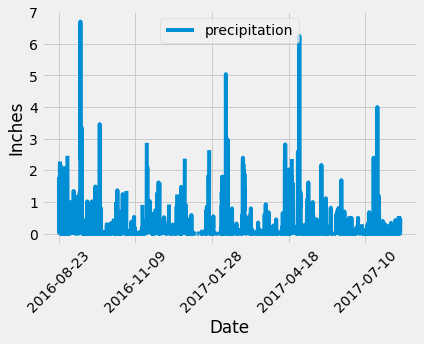

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precip_df_sorted.plot(x='date', y='precipitation', rot=45)

plt.savefig("output/precipitation.png")

plt.ylabel("Inches")

plt.xlabel("Date")





In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df_sorted.describe()



In [ ]:
# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
available_stations = session.query(Measurement.station).distinct().count()

print(f"Stations Available : {available_stations}")

Stations Available : 9


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

print(f"Most Active Stations")
active_stations


Most Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
most_active_station = max(active_stations,key=lambda item:item[1])[0]

most_active_station

'USC00519281'

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

print(f"Most Active Station: {most_active_station}")

most_active_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                 func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()

#convert tuple to list
temps_array = np.asarray(most_active_temps) 

lowest_temp = np.min(temps_array)
highest_temp = np.max(temps_array)
avg_temp = np.mean(temps_array)

print(f"Most Active Station Temperatures")
print(f"Low: {lowest_temp} High: {highest_temp} Average: {round(avg_temp, 2)}")

Most Active Station: USC00519281
Most Active Station Temperatures
Low: 54.0 High: 85.0 Average: 70.22


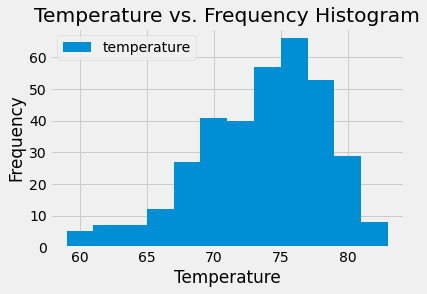

In [20]:
# Using the most active station id

most_temps_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_temps_station=most_temps_station[0]
most_temps_station

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_observations = session.query(Measurement.tobs).filter(Measurement.date >= previous_year).filter(Measurement.station == most_temps_station).all()
temperature_observations = pd.DataFrame(temperature_observations, columns=['temperature'])
temperature_observations

#12 bins
temperature_observations.plot.hist(bins=12, title="Temperature vs. Frequency Histogram")
plt.tight_layout()
plt.xlabel("Temperature")
try:
    plt.savefig("output/Temperature vs. Frequency Histogram.png")
except:
    pass


# Close session

In [21]:
# Close Session
session.close()